#### This FIFA WORLD CUP Project from (1930-2014) analyzes trends and discover insights about the world's game, football.


#### Objective
- Analyzes trends and discover insights about the world's game, football.


In [1]:
#importing the necessary libraries for this project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
#load the dataset
df=pd.read_csv("WorldCupMatches.csv")

### DATA CLEANING

In [32]:
#making a copy of the dataset
WorldCup = df.copy()

In [34]:
#the first 5 to inspect the dataset
WorldCup.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


A new column was added to make my analyses easier. The main purpose of ading this column is because of analyzing more of african countries

In [36]:
# Step 1: List of African teams that have participated in the World Cup
african_teams = ['Egypt', 'Morocco', 'Algeria', 'Tunisia', 'Cameroon', 
                 'Nigeria', 'South Africa', 'Ghana', 'Ivory Coast', 'Senegal', 'Angola']

# Step 2: Create a column to flag whether the match involves an African team
WorldCup['Is_African_Team'] = WorldCup['Home Team Name'].isin(african_teams) | \
                                    WorldCup['Away Team Name'].isin(african_teams)

# Step 3: Filter matches involving African teams
african_team_matches = WorldCup[WorldCup['Is_African_Team']]

# Display the first few rows of the filtered dataset
WorldCup.head()


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Is_African_Team
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,False
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,False
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,False
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,False
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,False


In [38]:
#total nummber of rows and columns
WorldCup.shape

(4572, 21)

In [44]:
#checking for duplicated values
WorldCup.duplicated().sum()

3735

In [50]:
#droping the duplicated values
WorldCup.drop_duplicates(keep=False, inplace=True)

In [52]:
WorldCup.shape

(820, 21)

In [60]:
#checking if there are missing values
WorldCup.isnull().sum().sum()

0

In [62]:
# inspecting the data type for each columns
WorldCup.dtypes

Year                    float64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals         float64
Away Team Goals         float64
Away Team Name           object
Win conditions           object
Attendance              float64
Half-time Home Goals    float64
Half-time Away Goals    float64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                 float64
MatchID                 float64
Home Team Initials       object
Away Team Initials       object
Is_African_Team            bool
dtype: object

### DATA EXPLORATION

#### Changing the year datatype from float to string

In [66]:
# converting the column 'Year' to an integer to remove the decimal point and then convert it to string(object)
WorldCup['Year'] = WorldCup['Year'].astype(int).astype(str)


In [70]:
#confirming the 'Year' data type
WorldCup['Year'].dtype

dtype('O')

In [75]:
# Creating a new column 'Total Goals' by summing 'Home Team Goals' and 'Away Team Goals'
WorldCup['Total Goals'] = WorldCup['Home Team Goals'] + WorldCup['Away Team Goals']

##### Duplicates and missing values have been handled appropriately. The dataset has been cleaned and explored.

### DATA VISUALIZATION

In [79]:
#setting the style Set the style of the plot to be whitegrid 
sns.set_style('whitegrid')

#### Total Goals Scored in Each World Cup Year

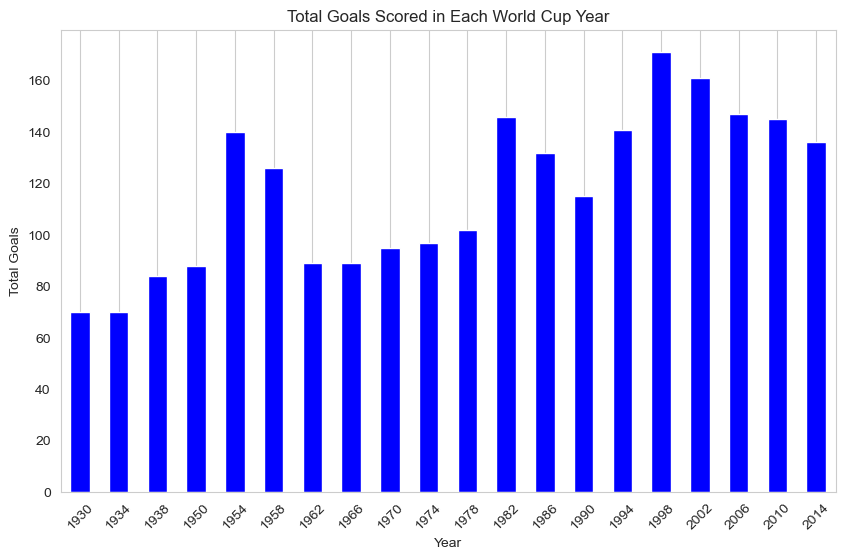

In [84]:
# Visualizing the total Goals Scored in Each World Cup Year
#step1:  Grouping by the year 
goals_per_year = WorldCup.groupby('Year')['Total Goals'].sum()

#step 2: Plotting the total goals per year
plt.figure(figsize=(10, 6))
goals_per_year.plot(kind='bar', color='blue')
plt.title('Total Goals Scored in Each World Cup Year')
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


##### KEY OBSERVATIONS: 

- Increasing Trend:
There is a noticeable increase in the total number of goals scored over the years, especially from 1930 to the 1950s. This could be due to various factors such as changes in the number of participating teams, match formats, or offensive strategies becoming more prevalent.

- Peaks and Declines:
1. 1954: This year stands out with the highest number of goals scored, exceeding 160 goals. The 1954 World Cup, held in Switzerland, is known for high-scoring games and featured 16 teams.
2.  1982: Another significant peak is observed in 1982, which may be attributed to the expansion of the tournament from 16 to 24 teams, leading to more matches and thus more goals.
3. 2002 and 2014: The number of goals remained relatively high, with peaks around these years.

- Fluctuations:
The total number of goals fluctuates in the 1960s and 1970s, with slight declines during some tournaments. This might reflect changes in defensive tactics, team performance, or other factors affecting match outcomes.

- Stability:
From the 1990s to 2014, the number of goals scored seems to stabilize, with minor fluctuations. This could indicate that the tournament format and team strategies reached a level of consistency.

*Conclusion*:
The chart provides a clear visualization of how the total goals per World Cup year have evolved over time, reflecting the changing dynamics of the tournament. The peaks suggest years with particularly high-scoring matches, while the overall trend indicates growth in the number of goals scored as the World Cup expanded and evolved.

#### Calculating the total goals for each country that had the highest number of goals scored in the World Cup matches

In [89]:
# Calculating total goals for each country (home and away)
home_goals = WorldCup.groupby('Home Team Name')['Home Team Goals'].sum()
away_goals = WorldCup.groupby('Away Team Name')['Away Team Goals'].sum()

In [91]:
# Combining the home and away goals
total_goals_by_country = home_goals.add(away_goals, fill_value=0)

In [93]:
# Finding the country with the highest number of goals
max_goals_country = total_goals_by_country.idxmax()
max_goals = total_goals_by_country.max()

In [95]:
# Printing the country with the highest goals
print(f"The country with the highest number of goals is {max_goals_country} with {max_goals} goals.")

The country with the highest number of goals is Brazil with 217.0 goals.


### Visualizing the total goals for each country

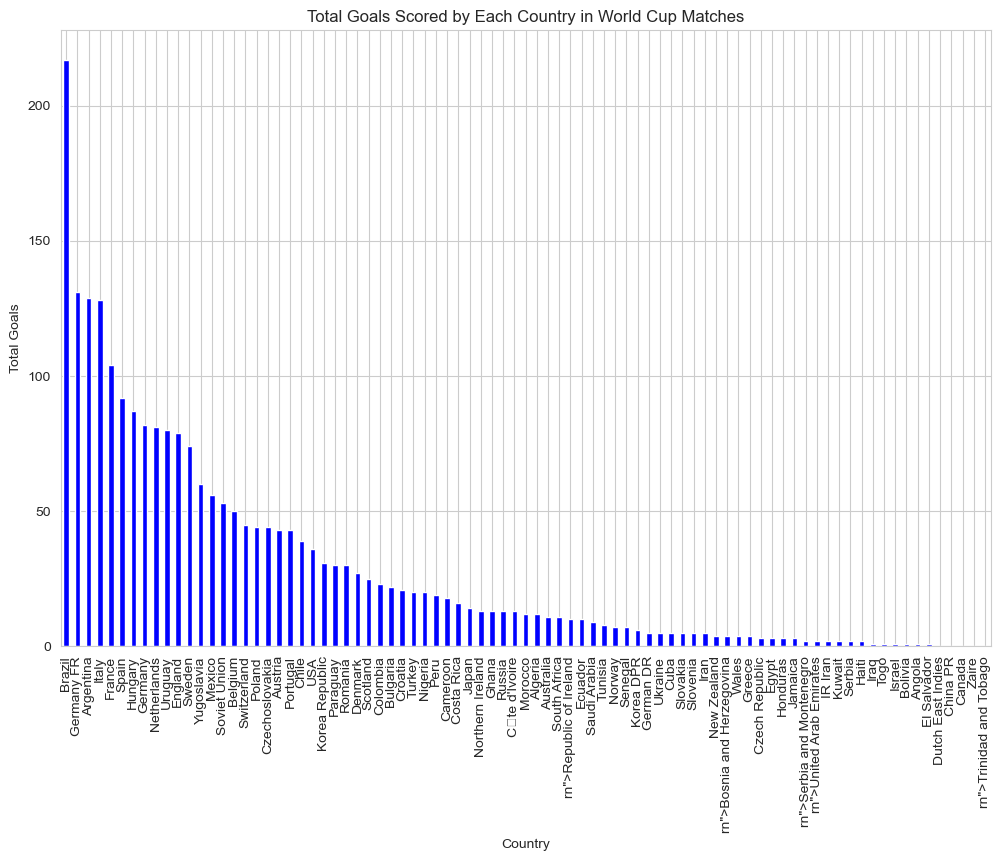

In [98]:
# Visualize the total goals for each country
plt.figure(figsize=(12, 8))
total_goals_by_country.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Total Goals Scored by Each Country in World Cup Matches')
plt.xlabel('Country')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.show()

### Performance of Teams Over Time
- Question: How has the performance of specific teams evolved over the years?

In [101]:
#Approach: Filter the data for specific teams, group by year, and sum the goals. 
#Plot the results to see trends.

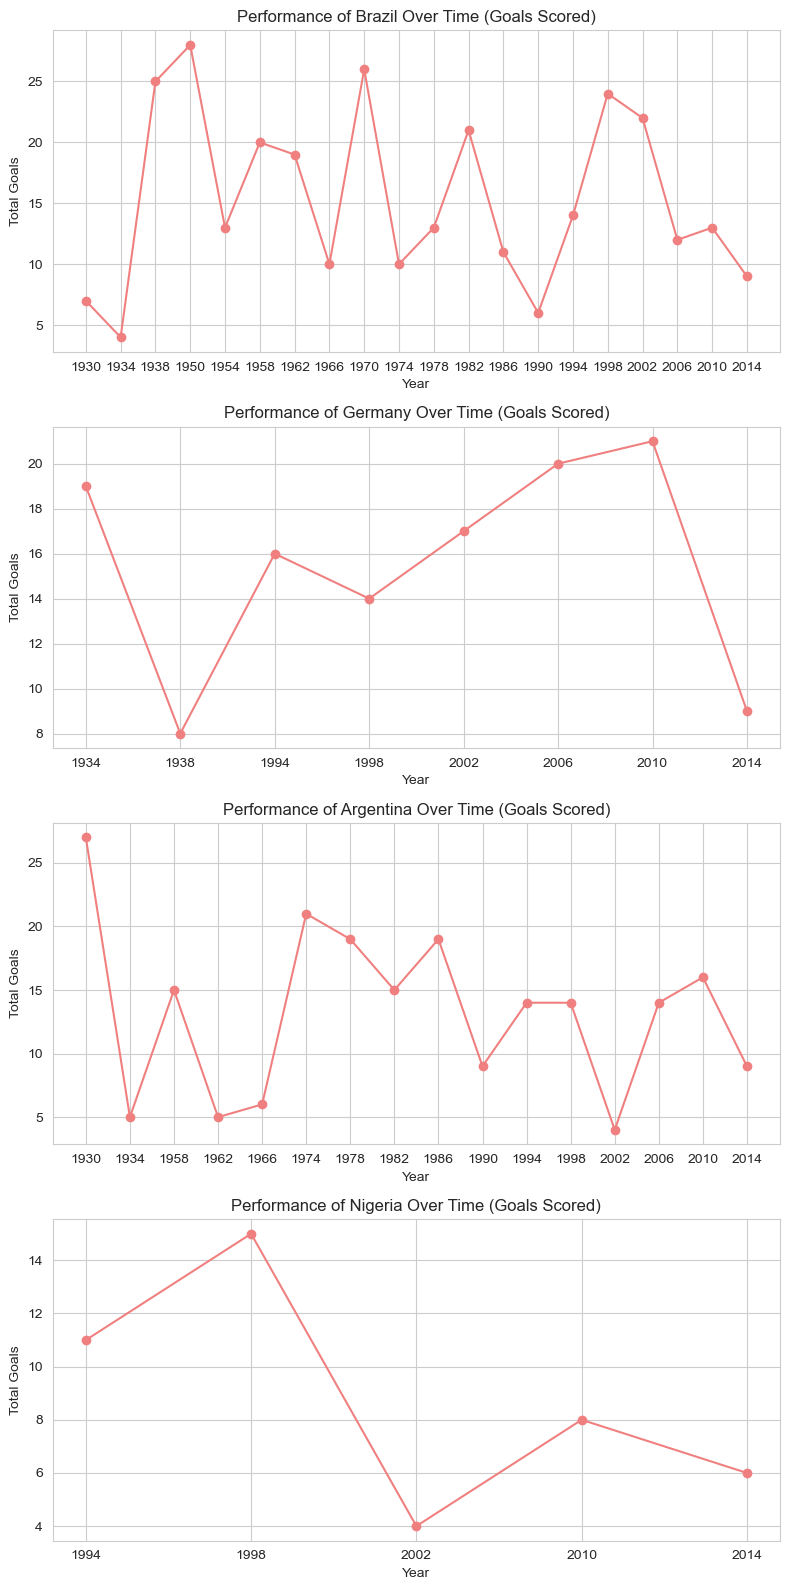

In [103]:
teams = ['Brazil', 'Germany', 'Argentina', 'Nigeria']  

fig, axes = plt.subplots(len(teams), 1, figsize=(8, len(teams) * 4))

for i, team in enumerate(teams):
    team_goals = WorldCup[(WorldCup['Home Team Name'] == team) | (WorldCup['Away Team Name'] == team)]
    team_goals_per_year = team_goals.groupby('Year')['Total Goals'].sum()
    axes[i].plot(team_goals_per_year, marker='o', color='lightcoral')
    axes[i].set_title(f'Performance of {team} Over Time (Goals Scored)')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Goals')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


## Average Goals Per Match Over the Years
- Question: How has the average number of goals per match changed over the years?

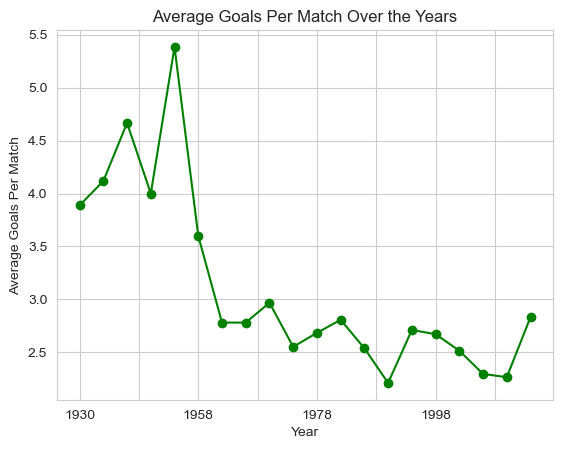

In [156]:
avg_goals_per_match = WorldCup.groupby('Year')['Total Goals'].mean()
avg_goals_per_match.plot(kind='line', marker='o', color='green')
plt.title('Average Goals Per Match Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Goals Per Match')
plt.grid(True)
plt.show()


## Highest Scoring Matches
- Question: Which matches had the highest number of total goals scored?


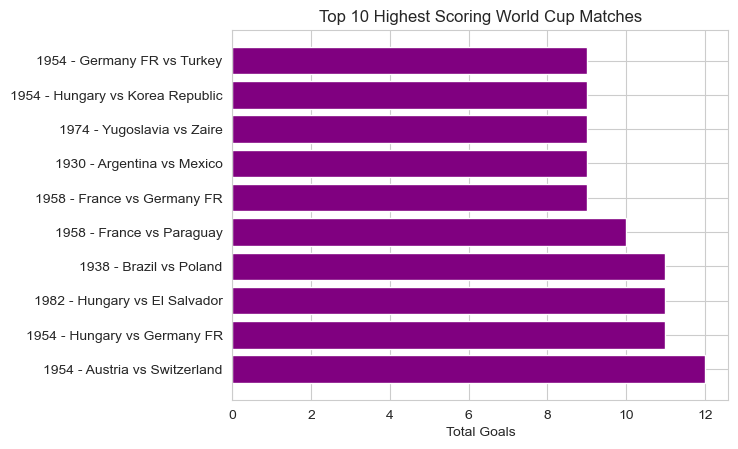

In [167]:
top_matches = WorldCup.sort_values('Total Goals', ascending=False).head(10)
plt.barh(top_matches['Year'] + ' - ' + top_matches['Home Team Name'] + ' vs ' + top_matches['Away Team Name'], top_matches['Total Goals'], color='purple')
plt.xlabel('Total Goals')
plt.title('Top 10 Highest Scoring World Cup Matches')
plt.show()


## ANALYZING AFRICAN MATCHES

#### Total Goals Scored in Matches Involving African Teams (1930-2014)

In [117]:
# Group by year and sum total goals for matches involving African teams
african_team_goals = WorldCup.groupby('Year')['Total Goals'].sum().reset_index()

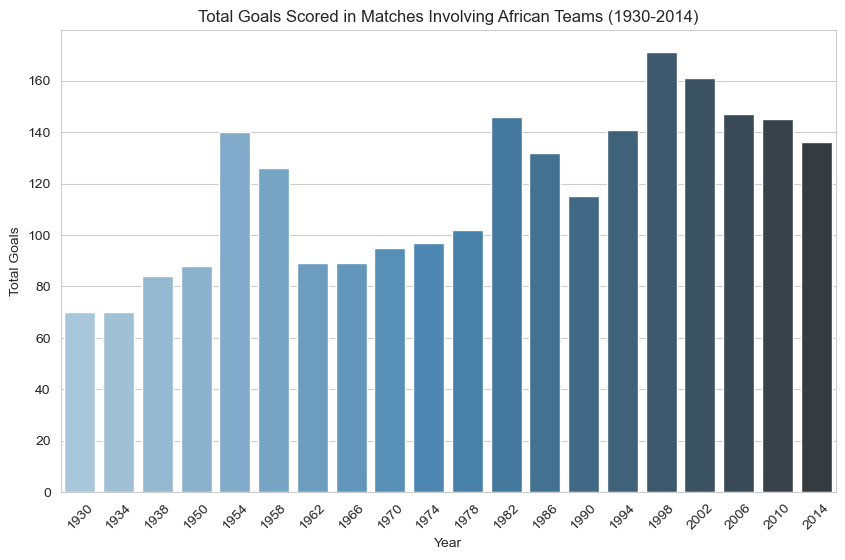

In [119]:
# Plot total goals scored in matches involving African teams by year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total Goals', data=african_team_goals, palette='Blues_d')
plt.title('Total Goals Scored in Matches Involving African Teams (1930-2014)')
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.show()

### Performance of African Teams Over Time

In [122]:
# Create a win/loss/draw status for African teams based on match results
african_team_matches['Result'] = african_team_matches.apply(
    lambda row: 'Win' if row['Home Team Name'] in african_teams and row['Home Team Goals'] > row['Away Team Goals'] else
                'Win' if row['Away Team Name'] in african_teams and row['Away Team Goals'] > row['Home Team Goals'] else
                'Draw' if row['Home Team Goals'] == row['Away Team Goals'] else 'Loss', axis=1)




In [124]:
# Group by year and result to see performance over time
african_team_performance = african_team_matches.groupby(['Year', 'Result']).size().reset_index(name='Count')



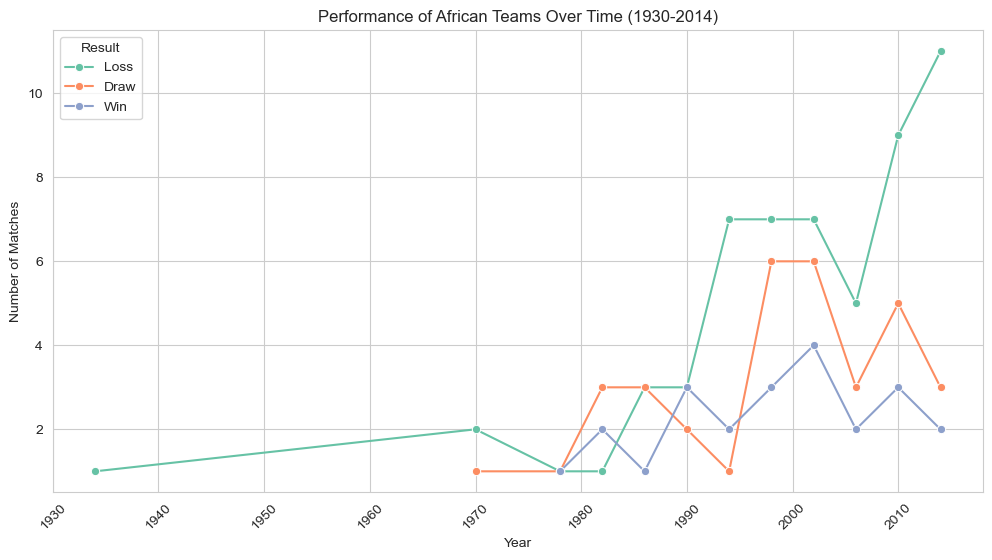

In [126]:
# Plot performance of African teams over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Count', hue='Result', data=african_team_performance, marker='o', palette='Set2')
plt.title('Performance of African Teams Over Time (1930-2014)')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

### Average Attendance of African Team Matches

In [151]:
# Group by year and calculate the average attendance for African team matches
african_team_attendance = WorldCup.groupby('Year')['Attendance'].mean().reset_index()

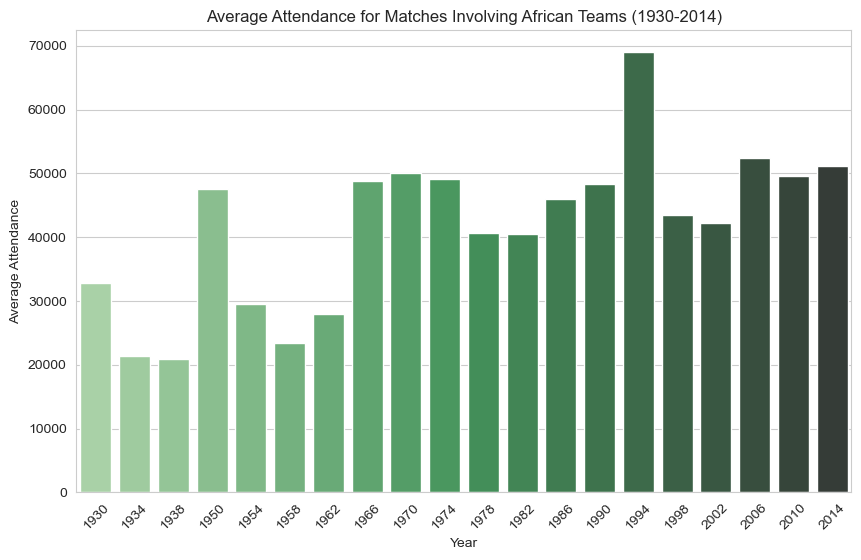

In [153]:
# Plot average attendance for African team matches by year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Attendance', data=african_team_attendance, palette='Greens_d')
plt.title('Average Attendance for Matches Involving African Teams (1930-2014)')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)
plt.show()